# 케라스 창시자에게 배우는 딥러닝

[케라스 창시자에게 배우는 딥러닝] 책을 기반으로 하고 있음  
https://github.com/rickiepark/deep-learning-with-python-notebooks

p56~p116  

# 2.1

In [1]:
from keras.datasets import mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


In [3]:
train_images.shape 

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

In [10]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [14]:
#keras 신경망구조
#신경망 층은 주어진 문제에 더 의미있는 표현을 입력된 데이터로부터 추출함.
from keras import models
from keras import layers

network = models.Sequential()

#2개의 dense층, 각 층은 가중치 텐서를 포함하여 입력 데이터에 몇개의 간단한 텐서 연산을 적용
network.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,))) #dense는 완전 연결
network.add(layers.Dense(10, activation = 'softmax')) #10개의 확률점수가 들어있는 배열, 모두 더하면 1, 각 점수는 이미지가 10개의 숫자 클래스 중 하나에 속할 확률

In [15]:
#컴파일
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy', #손실 함수, 가중치 텐서를 학습하기 위한 피드백 신호로 사용. 훈련하는 동안 최소화.
               metrics=['accuracy'])

In [16]:
#데이터 float32로 변경
train_images = train_images.reshape((60000,28*28)) #훈련 데이터 크기 (60000, 784)의 넘파이 배열
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28)) #훈련 데이터 크기 (10000, 784)의 넘파이 배열
test_images = test_images.astype('float32')/255

In [21]:
#데이터 레이블 준비
#레이블 범주형으로 인코딩
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [22]:
#fit 메서드 호출하여 훈련데이터에 모델 학습
network.fit(train_images, train_labels, epochs=5, batch_size=128)
#128개 샘플씩 미니배치로, 훈련 데이터를 다섯 번 반복
#전체 훈련 데이터에 수행되는 각 반복을 에포크.
#각 반복마다 네트워크가 배치에서 솔실에 대한 가중치의 그래디언트를 계산하고, 그에 맞추어 가중치 업데이트
#다섯번의 에포크 동안 네트워크는 2345번의 그래디언트 업데이트를 수행. 에포크마다 469번
#훈련샘플이 6만개이므로, 128개 배치로 나누면 469개의 배치가 만들어지고, 마지막 배치의 샘플 개수는 96개

#훈련하는 동안 출력되는 정보
#1. 훈련 데이터에 대한 네트워크의 손실 2.정확도

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2569 - accuracy: 0.9251
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1038 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0683 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0493 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0373 - accuracy: 0.9886


In [23]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.0618 - accuracy: 0.9815


In [24]:
print('test_acc: ', test_acc)

#훈련세트 정확도 0.9886보다 살짝 낮음. 
#훈련 정확도와 테스트 정확도 사이의 차이는 과대적합 때문 : 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 경향

test_acc:  0.9815000295639038


## 2.2 신경망을 위한 데이터 표현

In [29]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [30]:
print(train_images.ndim) #ndim 속성으로 축의 갯수를 확인

3


In [32]:
print(train_images.shape, train_images.dtype) 
#8비트 정수형 3D텐서. 
#28*28 크기의 정수 행렬 6만개가 있는 배열. 
#각 행렬은 하나의 흑백 이미지이고, 행렬의 각 원소는 0에서 255 사이의 값을 가짐

(60000, 28, 28) uint8


In [33]:
digit = train_images[4]

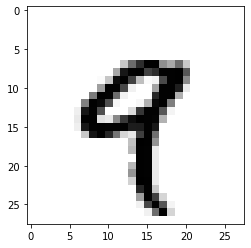

In [34]:
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## 3.4 영화 리뷰 분류: 이진 분류 예제

In [50]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) #num_words는 가장 자주 나타나는 단어 1만개만 사용하겠다는 의미.

In [51]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [52]:
train_labels[0]

1

In [53]:
max([max(sequence) for sequence in train_data]) #num_words를 1만개로 제한했기 때문에 인덱스는 10000을 넘지 않음

9999

- 인코딩된 리뷰 다시 텍스트로 디코딩 해보기

In [54]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()]) #정수 인덱스와 단어를 매핑하도록 뒤집음
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]]) #리뷰를 디코딩함. 0, 1, 2 '패딩' '문서시작' '사전에 없음'

In [55]:
len(word_index), word_index #단어와 정수 인덱스를 매핑한 딕셔너리

(88584,
 {'fawn': 34701,
  'tsukino': 52006,
  'nunnery': 52007,
  'sonja': 16816,
  'vani': 63951,
  'woods': 1408,
  'spiders': 16115,
  'hanging': 2345,
  'woody': 2289,
  'trawling': 52008,
  "hold's": 52009,
  'comically': 11307,
  'localized': 40830,
  'disobeying': 30568,
  "'royale": 52010,
  "harpo's": 40831,
  'canet': 52011,
  'aileen': 19313,
  'acurately': 52012,
  "diplomat's": 52013,
  'rickman': 25242,
  'arranged': 6746,
  'rumbustious': 52014,
  'familiarness': 52015,
  "spider'": 52016,
  'hahahah': 68804,
  "wood'": 52017,
  'transvestism': 40833,
  "hangin'": 34702,
  'bringing': 2338,
  'seamier': 40834,
  'wooded': 34703,
  'bravora': 52018,
  'grueling': 16817,
  'wooden': 1636,
  'wednesday': 16818,
  "'prix": 52019,
  'altagracia': 34704,
  'circuitry': 52020,
  'crotch': 11585,
  'busybody': 57766,
  "tart'n'tangy": 52021,
  'burgade': 14129,
  'thrace': 52023,
  "tom's": 11038,
  'snuggles': 52025,
  'francesco': 29114,
  'complainers': 52027,
  'templarios'

In [56]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

- 신경망에 숫자 리스트를 주입할 수 없음.
- 리스트를 텐서로 바꿔줘야 함.

1.
같은 길이가 되도록 리스트에 패딩을 추가하고 (samples, sequence_length) 크기의 정수 텐서로 변환함.   
그다음 이 정수 텐서를 다룰 수 있는 층을 신경망의 첫 번째 층으로 사용(embedding 층임)   

2.
리스트를 원핫 인코딩하고, 부동 소수 벡터 데이터를 다룰 수 있는 dense 층을 신경망의 첫번째 층으로 사용.

In [75]:
#정수 시퀀스를 이진 행렬로 인코딩하기
#두번째 방법
import numpy as np

def vectorize_sequences(sequences, dimension = 10000): #10000차원으로 정수 시퀀스 인코딩
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [80]:
x_train[1:4].shape #한개의 게시글 차원이 10000으로.

(3, 10000)

In [81]:
#레이블 벡터로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [82]:
#모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) #긍정, 부정 두개로 나눌 때 시그모이드 함수를 사용함.

In [84]:
#모델 컴파일 하기
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [91]:
#이따금 자신만의 손실 함수, 측정 함수를 전달해야 할 경우가 있음
#케라스의 백엔드 함수를 사용하여 자신만의 손실 함수를 만들 수 있음 https://bit.ly/2rk5Yzp

from keras.optimizers import rmsprop_v2

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [92]:
#훈련 검증
#원본 훈련 데이터에서 10000개 샘플 떼어내어 검증 세트를 만들음

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [93]:
#모델 훈련
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train, 
                   partial_y_train,
                   epochs=20, #512개의 샘플씩 미니배치를 만들어 20번의 에포크 동안 훈련시킴 
                   batch_size=512,#전체데이터 수/512 * 20 = 그래디언트(가중치) 업데이트 횟수
                   validation_data=(x_val, y_val)) #에포크가 끝날 때마다 1만개의 검증 샘플 데이터에서 손실과 정확도를 계산함

Epoch 1/20
30/30 [==============================] - 2s 32ms/step - loss: 0.4997 - acc: 0.7846 - val_loss: 0.3755 - val_acc: 0.8675
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2942 - acc: 0.9029 - val_loss: 0.2988 - val_acc: 0.8897
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2191 - acc: 0.9289 - val_loss: 0.2975 - val_acc: 0.8812
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1724 - acc: 0.9448 - val_loss: 0.3112 - val_acc: 0.8731
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1407 - acc: 0.9549 - val_loss: 0.2950 - val_acc: 0.8850
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1164 - acc: 0.9634 - val_loss: 0.2971 - val_acc: 0.8843
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0961 - acc: 0.9719 - val_loss: 0.3109 - val_acc: 0.8844
Epoch 8/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0811 - a

In [95]:
#history는 훈련과 검증하는 동안 모니터링할 측정 지표당 하나씩 모두 4개의 항목을 담고 있음.
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

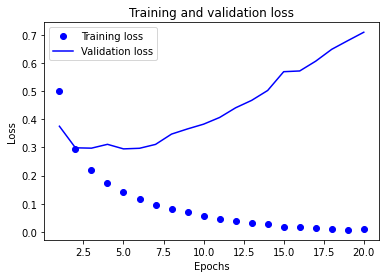

In [98]:
#history 항목으로 그래프 그림
#훈련과 검증 손실
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show() #과대 적합된 그래프

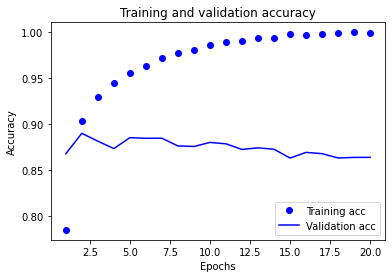

In [99]:
#훈련과 검증 정확도 그리기
plt.clf() #그래프 초기화

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show() #두번째 에포크부터 훈련 데이터에 과도하게 최적화되어 훈련 데이터에 특화된 표현만을 학습한다. 일반화되지 못함.
#세번째 에포크 이후에 훈련을 중지한다.

In [102]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 1s 1ms/step - loss: 0.7852 - acc: 0.8470


[0.785150408744812, 0.847000002861023]

In [104]:
#모델 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512) #위에 그래프에서 epoch 3이후부터 과대적합 됐음을 발견하여 4까지만
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.4590 - accuracy: 0.8197
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2617 - accuracy: 0.9072
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2019 - accuracy: 0.9280
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3039 - accuracy: 0.8793


In [105]:
results #87%의 정확도 달성 loss는 0.3

[0.303890585899353, 0.8792799711227417]

In [108]:
#새로운 데이터에 대해 예측
y_pred = model.predict(x_test)

In [109]:
y_pred

array([[0.16411734],
       [0.99981284],
       [0.73354226],
       ...,
       [0.09916353],
       [0.0566133 ],
       [0.4794307 ]], dtype=float32)

In [110]:
y_pred[1] #2번째 샘플에 대해 99% 확신

array([0.99981284], dtype=float32)